<a href="https://colab.research.google.com/github/emiliomercuri/EnvHydrology2026/blob/main/Aulas/Aula01-Introducao/Reservatorio_Cheias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solução do Exemplo 2 - Reservatório de Cheias

Resolução via método das diferenças finitas da equação:

$$
\begin{aligned}
\frac{\mathrm{d} H}{\mathrm{~d} t}+b H^{3 / 2} &=f(t) \\
b &=\frac{\alpha \sqrt{g} L}{A}, \quad f(t)=\frac{I(t)}{A}
\end{aligned}
$$

Com condição inicial $H(0) = 0$ e $f(t)$ variando como:

$$
I(t)=\left\{\begin{array}{ll}
t / 360, & 0 \leq t \leq 3600 \\
50 / 3-t / 540 & 3600<t \leq 9000
\end{array}\right.
$$

Discretização em diferenças finitas:

$$
\frac{H_{n+1} - H_{n}}{\Delta t} + b H_n^{3/2} = f(t_n)
$$

$$
H_{n+1} = H_n + \Delta t \left[f(t_n)- b H_n^{3/2}\right]
$$


In [ ]:
from math import sqrt
import numpy as np

In [ ]:
# Área do reservatório
A    = 100000.0 # m2
alfa = 0.493
g    = 9.81
L    = 20.0
b    = alfa*sqrt(g)*L/A

In [ ]:
# hidrógrafa afluente (m3/s/m2)
def f(t):
  if t <= 3600:
    return (t/360.0)/A
  elif t <= 9000:
    return (50.0/3.0 - t/540.0)/A
  else:
    return 0.0

In [ ]:
Alturas   = []
Qafluente = []
Vazoes    = []
Tempo     = []

Discretização em diferenças finitas:

$$
\frac{H_{n+1} - H_{n}}{\Delta t} + b H_n^{3/2} = f(t_n)
$$

$$
H_{n+1} = H_n + \Delta t \left[f(t_n)- b H_n^{3/2}\right]
$$


In [ ]:
tempo = 0
H = 0
deltat = 60
while tempo < 36000:
  #print(tempo)
  tempo = tempo + deltat
  I = A*f(tempo)
  H = H + deltat*(f(tempo)-b*H**1.5)
  Q = b*A*H**1.5
  Alturas.append(H)
  Vazoes.append(Q)
  Tempo.append(tempo)
  Qafluente.append(I)


In [ ]:
#Tempo

In [ ]:
# Importando as bibliotecas
import numpy
import matplotlib.pyplot as plt
#%matplotlib inline

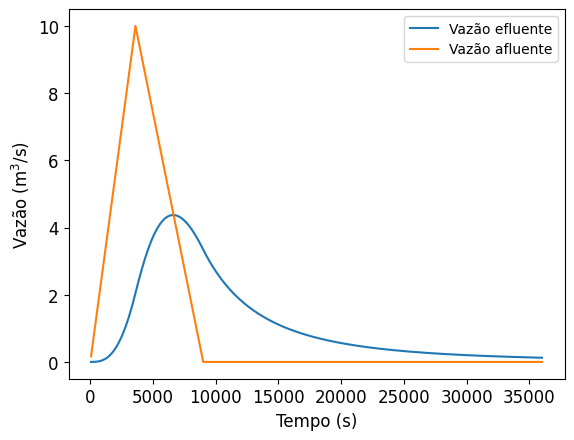

In [ ]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', labelsize=12) #increase font size for ticks
plt.ylabel(r'Vazão (m$^3$/s)', fontsize=12) #y label
plt.xlabel(r'Tempo (s)', fontsize=12) #y label
ax.plot(Tempo, Vazoes, label='Vazão efluente')
ax.plot(Tempo, Qafluente, label='Vazão afluente')
ax.legend()
plt.show()

In [ ]:
Qafluente[0:15], Vazoes[0:15]

([0.16666666666666666,
  0.3333333333333333,
  0.5,
  0.6666666666666666,
  0.8333333333333334,
  1.0,
  1.1666666666666667,
  1.3333333333333333,
  1.5,
  1.6666666666666667,
  1.8333333333333333,
  2.0,
  2.1666666666666665,
  2.3333333333333335,
  2.5],
 [3.088242665335741e-05,
  0.00016045492921334926,
  0.00045374686467611016,
  0.0009760211504396069,
  0.0017923620829455073,
  0.00296759557594262,
  0.004566222753386888,
  0.006652356234496017,
  0.009289657608584356,
  0.01254127583025764,
  0.01646978652581009,
  0.021137132272018768,
  0.02660456393012446,
  0.03293258312420824,
  0.04018088595408648])

In [ ]:
Qafluente.index(10)

59

In [ ]:
Vazoes[59]

2.050226205590782

In [ ]:
t_min = np.array(Tempo)/60
q_afl = np.array(Qafluente)

In [ ]:
len(t_min)

600

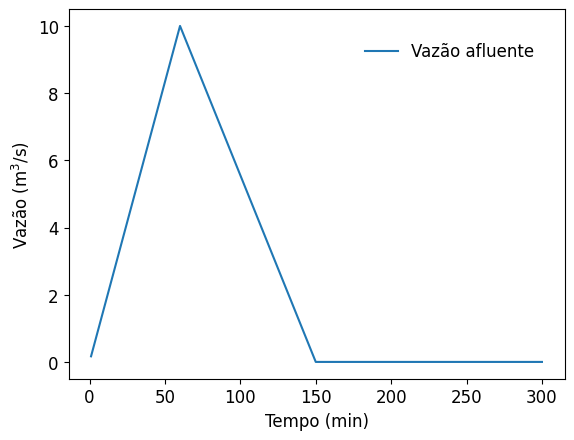

In [ ]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', labelsize=12) #increase font size for ticks
plt.ylabel(r'Vazão (m$^3$/s)', fontsize=12) #y label
plt.xlabel(r'Tempo (min)', fontsize=12) #y label
ax.plot(t_min[0:300], q_afl[0:300], label='Vazão afluente')
ax.legend()
ax.legend(loc="upper right",bbox_to_anchor=(0.97, 0.95), frameon=False, fontsize=12)
plt.savefig('afluente.pdf', dpi = 300, bbox_inches='tight')
plt.show()